Data Mining on Netflix Shows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [111]:
import itertools
plt.style.use('fivethirtyeight')

What does the data look like ?

This is an analysis of the Netflix shows based on the show ratings, with respect to different release years, seasons, awards, genre, language and age groups.

In [28]:
df = pd.read_csv("C:\\Users\\geetika singh\\Data Mining and Warehousing\\netflixdata.csv")
df.head()

,title,release year,seasons,ratings,awards,genre,language,age group
0,orange is the new black,2013,6,5.0,46,drama,english,16+
1,black mirror,2011,4,4.5,26,thriller,english,16+
2,chef's table,2015,5,4.5,20,documentary,english,16+
3,making a muderer,2015,2,4.0,11,documentary,english,16+
4,quantico,2015,3,3.5,4,thriller,english,13+


In [29]:
df.shape

(29, 8)

Checking the data for null or NaN values

In [30]:
df.isnull().sum()

title           0
release year    0
seasons         0
ratings         0
awards          0
genre           0
language        0
age group       0
dtype: int64

Analysis can be done since the data is clean

The 5 - number summary

In [31]:
df.describe()

,release year,seasons,ratings,awards
count,29.000000,29.000000,29.000000,29.000000
mean,2014.379310,2.724138,3.965517,16.413793
std,3.967851,1.943791,0.667231,11.365729
min,2000.000000,1.000000,2.000000,0.000000
25%,2013.000000,1.000000,3.500000,10.000000
50%,2015.000000,2.000000,4.000000,15.000000
75%,2017.000000,4.000000,4.500000,23.000000
max,2019.000000,7.000000,5.000000,46.000000


A boxplot can show whether a data set is symmetric (roughly the same on each side when cut down the middle) or skewed (lopsided). A symmetric data set shows the median roughly in the middle of the box. The median, part of the five-number summary, is shown by the line that cuts through the box in the boxplot.

In [134]:
df1 = df[['ratings']]
df2 = df[['awards']]

the data points for Ratings attribute seem to be symmetric because median line lies roughly in the middle of the box which means mean, median and mode coincide.

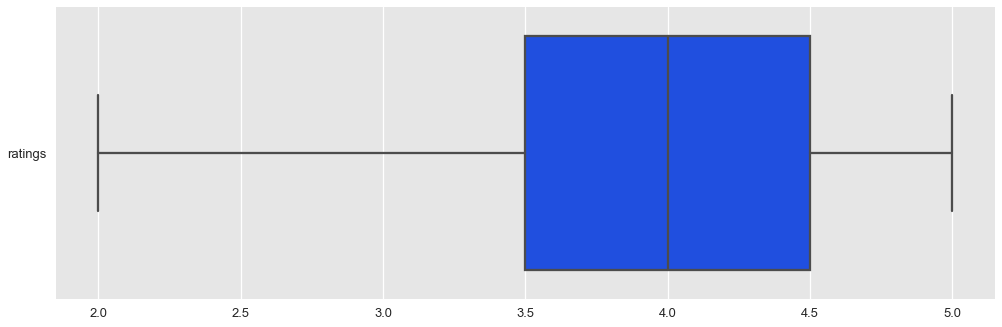

In [144]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.boxplot(data=df1,palette='bright',ax=ax,orient='h')

the data points for Awards attribute seem to be slightly skewed towards the right because median line lies roughly in the left of the box which means mean, median and mode do not coincide mean & mode are greater than the median value

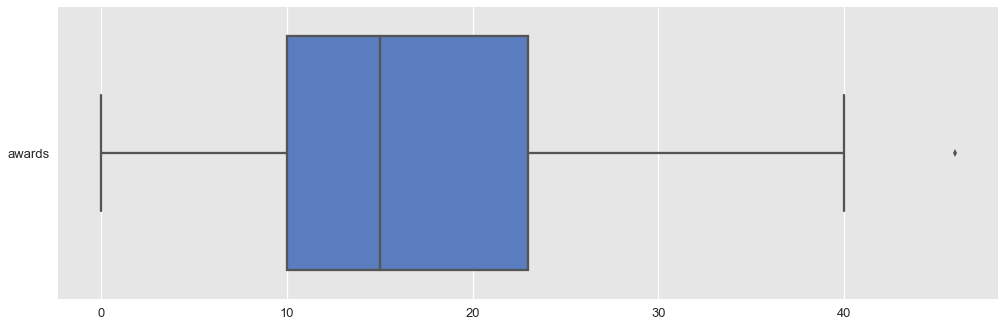

In [139]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.boxplot(data=df2,palette='muted',ax=ax,orient='h')

The seaborn equivalent to a pandas histogram is the distplot. It is a composite plot which shows the KDE also.The distplot shows the distribution of a univariate set of observations.

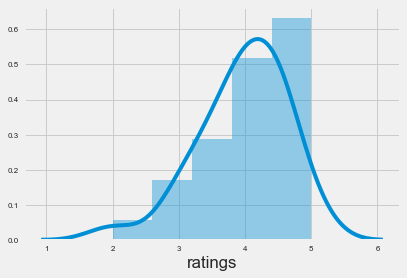

In [113]:
sns.distplot(df['ratings'])

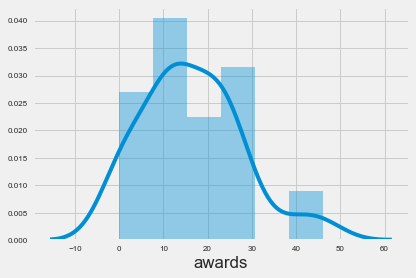

In [112]:
sns.distplot(df['awards'])

jointplot() allows you to basically match up two distplots for bivariate data.

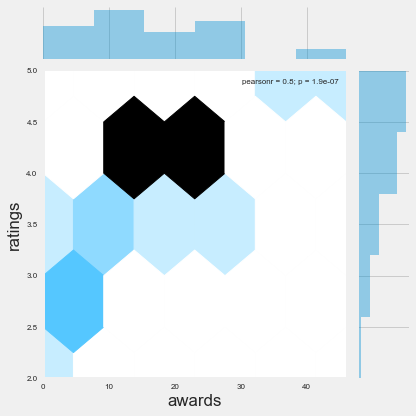

In [114]:
sns.jointplot(x='awards',y='ratings',data=df,kind='hex')

A count plot to count the no. of viewers in a particular age group and from this plot we infer that most of the shows on Netflix are for 16+ people.

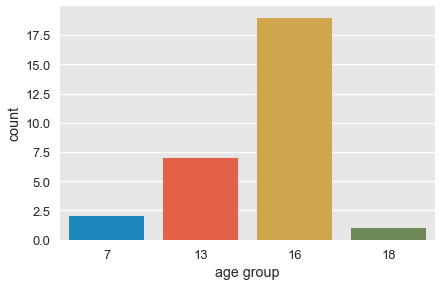

In [157]:
sns.countplot(x='age group',data=df)
plt.show()

a bar plot to show the top 5 most rated shows of netflix

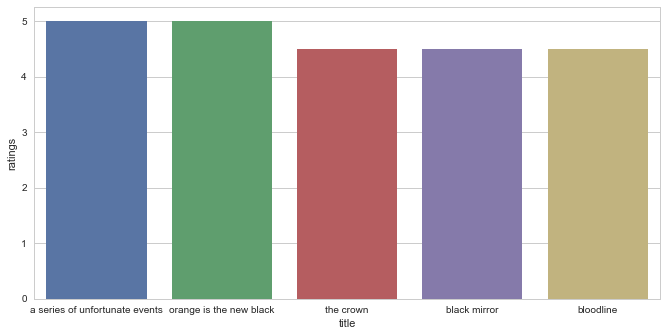

In [186]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
df1 = df.groupby('title').sum().reset_index().sort_values(by=('ratings'),ascending=False).head()
sns.barplot(x="title", y="ratings", data=df1,ax=ax)

Boxplot to visualize the distribution of awards in each genre

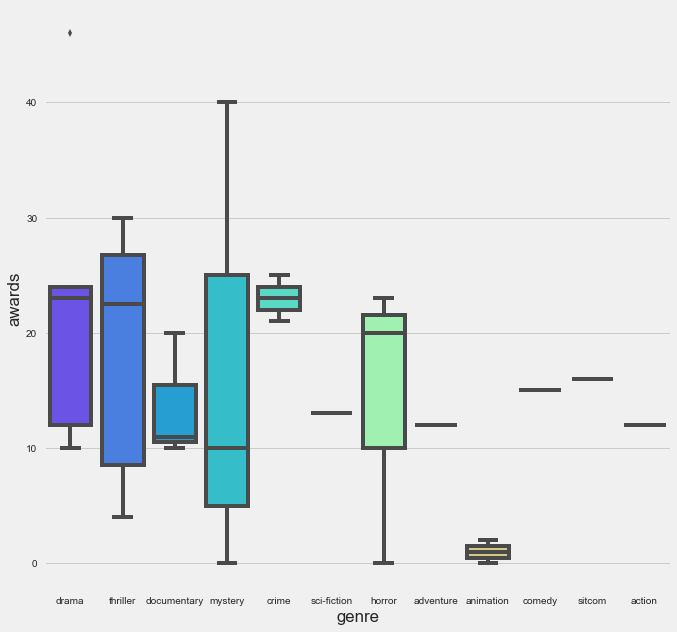

In [63]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
sns.boxplot(x="genre", y="awards", data=df ,palette='rainbow',ax=ax)

The box plot is an old standby for visualizing basic distributions. It's convenient for comparing summary statistics (such as range and quartiles), but it doesn't let you see variations in the data. For multimodal distributions (those with multiple peaks) boxplots can be particularly limiting.
Because sometimes the median and mean aren't enough to understand a dataset. To address questions like - Are most of the values clustered around the median? Or are they clustered around the minimum and the maximum with nothing in the middle? - violin plots are helpful. It's a hybrid of a box plot and a kernel density plot, which shows peaks in the data.
Violin plots have many of the same summary statistics as box plots:

the white dot represents the median

the thick gray bar in the center represents the interquartile range

the thin gray line represents the 95% confidence interval

On each side of the gray line is a kernel density estimation to show the distribution shape of the data. 

Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

This violin plot shows the relationship of genre type to ratings. The box plot elements show that the median rating for thriller shows is lower than that for other genres. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates the ratings of drama, thriller and docuseries are highly concentrated around the median.

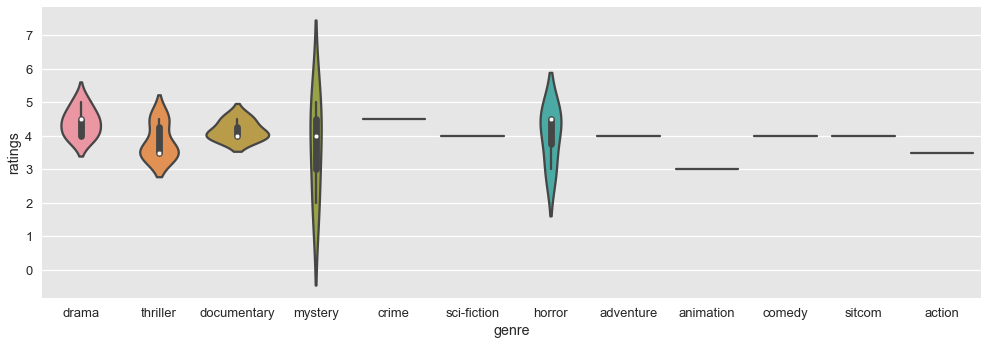

In [88]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.violinplot(x="genre", y="ratings", data=df,ax=ax)

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).
conditioning on an additional categorical variable is built into pairplot() using the hue parameter:

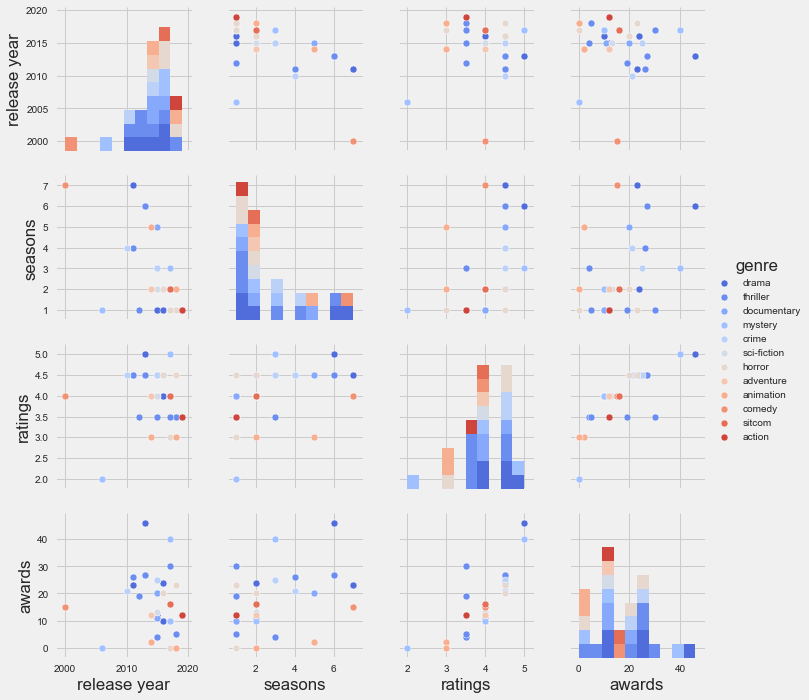

In [48]:
sns.pairplot(df,hue='genre',palette='coolwarm')

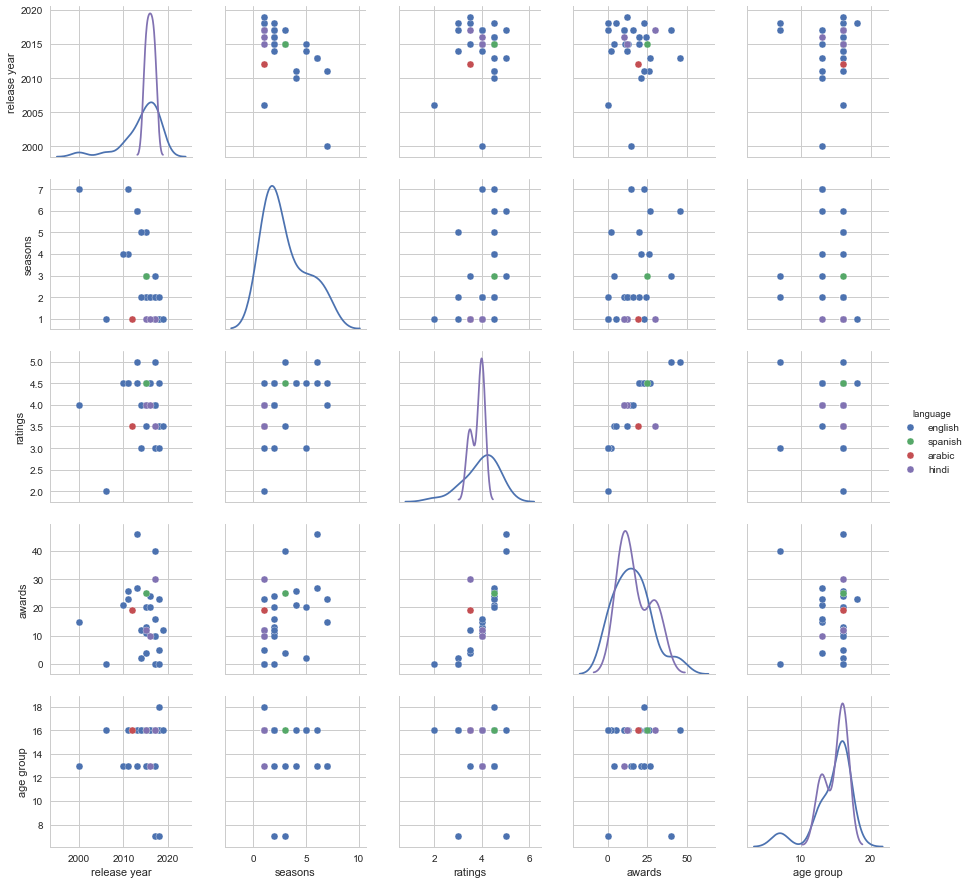

In [175]:
sns.pairplot(df,hue='language',diag_kind='kde')

The stripplot will draw a scatterplot where one variable is categorical.

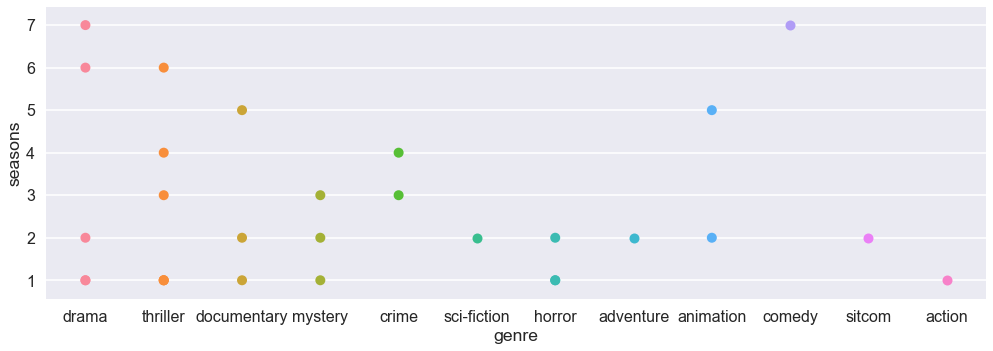

In [201]:
sns.set()
sns.set_context("poster")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.stripplot(x="genre", y="seasons", data=df,ax=ax,size=10)

Matrix plots allow you to plot data as color-encoded matrices.In order for a heatmap to work properly, the data should already be in a matrix form and the sns.heatmap function just fill in the colors.

In [70]:
# Matrix form for correlation data
df.corr()

,release year,seasons,ratings,awards
release year,1.000000,-0.564773,0.072567,-0.039242
seasons,-0.564773,1.000000,0.419227,0.396562
ratings,0.072567,0.419227,1.000000,0.800197
awards,-0.039242,0.396562,0.800197,1.000000


darker colors tell that ther's a negative correlation between the attributes while the lighter ones imply positive correlation

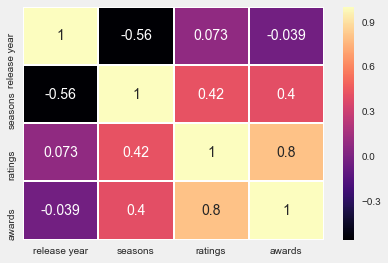

In [72]:
sns.heatmap(df.corr(),annot=True,cmap='magma',linecolor='white',linewidths=1)

understand the distribution of ratings on Netflix shows

This dataset contains multiple quantitative variables, and the goal of this analysis is to relate those variables with each other. This can be accomplished by showing the joint distribution of two variables. JointGrid is the general version for jointplot() type grids

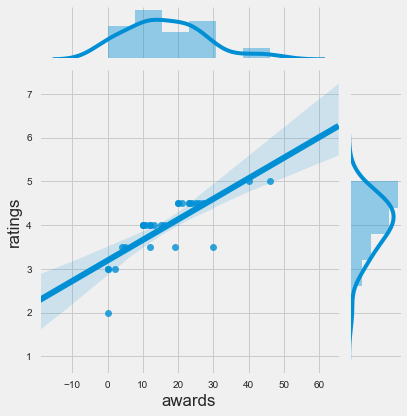

In [74]:
g = sns.JointGrid(x="awards", y="ratings", data=df)
g = g.plot(sns.regplot, sns.distplot)

the regression plots are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. While building the regression models, we often check for multicollinearity, where we had to see the correlation between all the combinations of continuous variables.

linear regression

lmplot allows us to display linear models and also allows to split up those plots based off of features, as well as colors the hue based off of features.

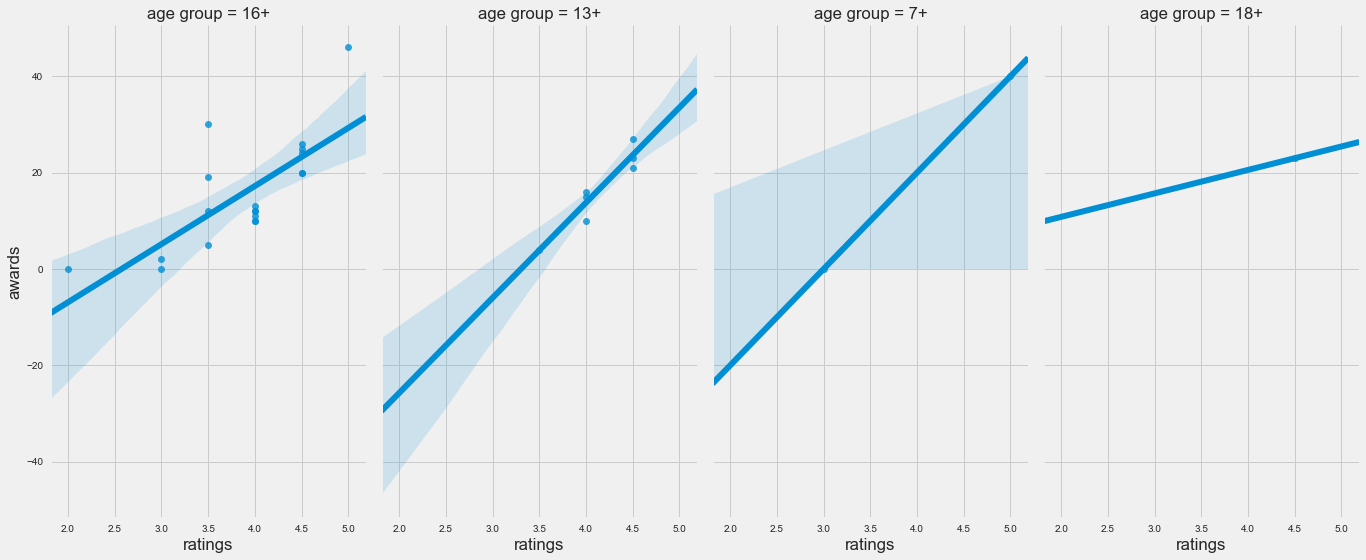

In [82]:
sns.lmplot(x='ratings',y='awards',data=df,col='age group',aspect=0.6,size=8)

In case of 16+ age group , the plot shows a high deviation of data points from the regression line which implies that the line of best fit is not good. Such non-linear, higher order can be visualized using the lmplot() and regplot().These can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset.

In case of 13+ age group, the data is a good fit for linear regression model with less variance.

multiple regression

As a predictive analysis, the multiple linear regression is used to explain the relationship between one continuous dependent variable and two or more independent variables. The independent variables can be continuous or categorical. It is an extension of simple linear regression. The variable we want to predict is called the dependent variable (or sometimes, the outcome, target or criterion variable).

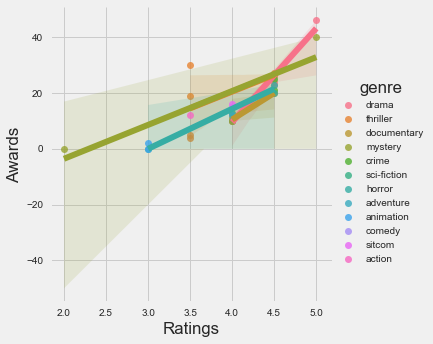

In [81]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="ratings", y="awards", hue="genre",truncate=True,data=df)
g.set_axis_labels("Ratings", "Awards")

Plotting a regression in other contexts

jointplot() can also use regplot() to show the linear regression fit on the joint axes by passing kind="reg":

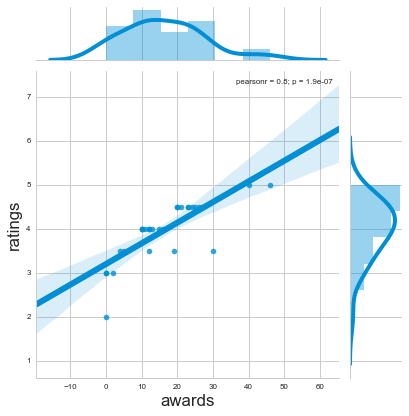

In [116]:
sns.set_style("whitegrid")
sns.jointplot(x='awards',y='ratings',data=df,kind='reg')